In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [50]:
data = pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Basic EDA

In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data['Species'].unique()


array([0, 1, 2])

<Axes: >

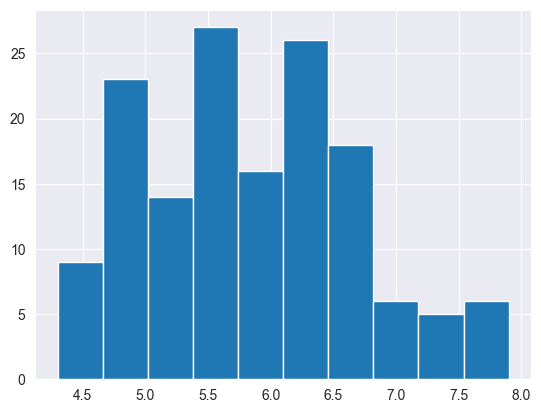

In [52]:
data["SepalLengthCm"].hist()

<Axes: >

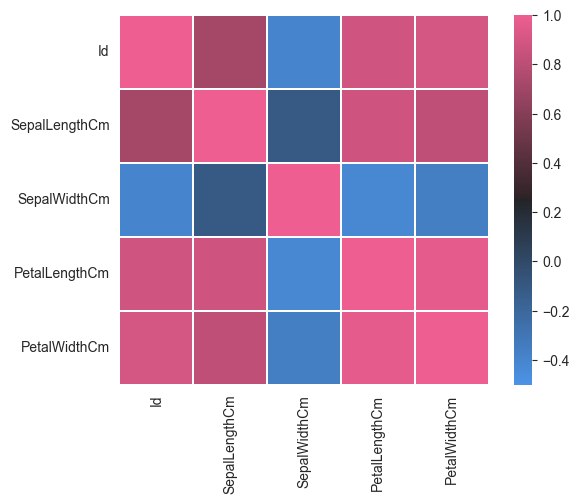

In [53]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [54]:
data = data[["Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm","Species"]]
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


<Axes: xlabel='Species', ylabel='Count'>

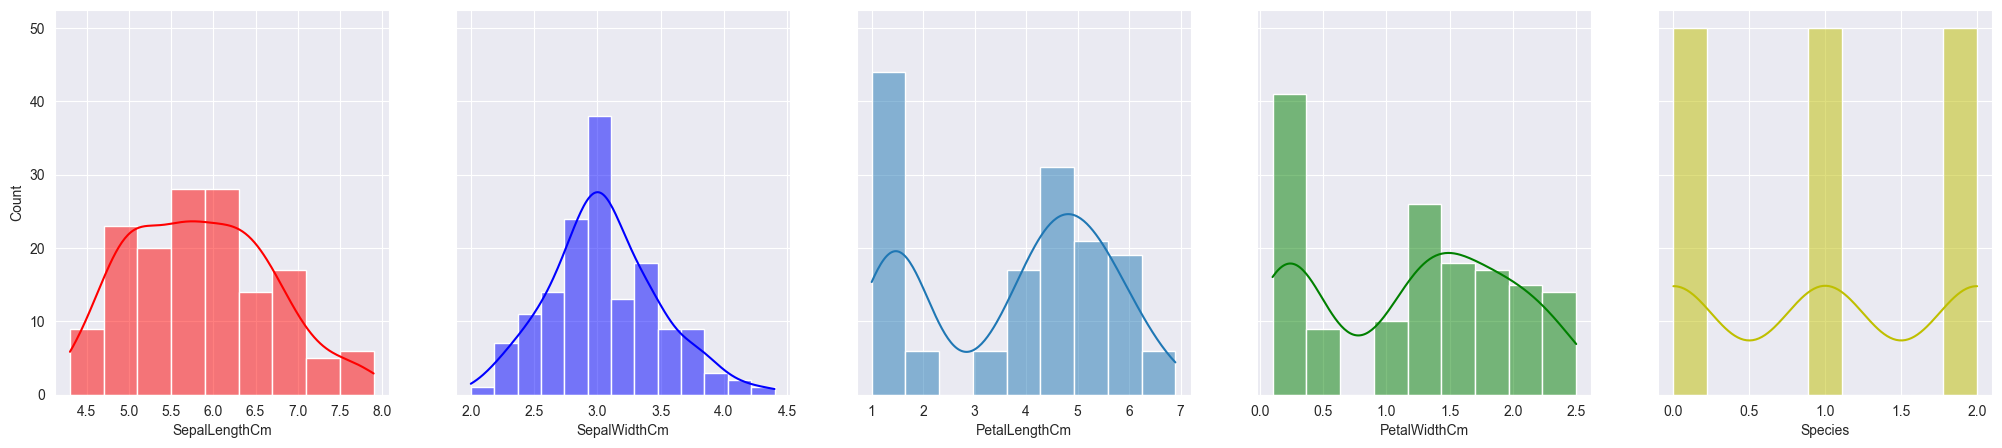

In [55]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
sns.histplot(data, ax=axes[0], x="SepalLengthCm", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="SepalWidthCm", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="PetalLengthCm", kde=True)
sns.histplot(data, ax=axes[3], x="PetalWidthCm", kde=True, color='g')
sns.histplot(data, ax=axes[4], x="Species", kde=True, color='y')

Calculate P(Y=y) for all possible y

In [56]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

Approach 1: Calculate P(X=x|Y=y) using Gaussian dist

In [57]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [58]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))


    return np.array(Y_pred) 

Test Gaussian model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Species")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred,average=None))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]
[1. 1. 1.]


In [60]:
print(Y_test)

[2 2 2 1 2 1 2 1 2 2 2 0 0 1 0 2 0 1 0 0 1 2 0 0 1 1 1 1 0 1]
